In [136]:
import yfinance as yf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Helper functions

In [114]:
def get_hist(ticker, interval = '1h', period = None):  # 1h seems to return max number of datapoints at once (730 days), cf. https://github.com/ranaroussi/yfinance/wiki/Ticker#history
    return yf.Ticker(ticker).history(interval = interval, period = period)

def transform_hist(hist):
    hist.loc[:, 'Return'] = hist.loc[:, 'Close'] / hist.loc[:, 'Close'].shift(1)
    hist.loc[:, 'Log Return'] = np.log(hist.loc[:, 'Return'])
    return hist

# Simple approach
model closing prices

In [115]:
hist = get_hist('DAX')

In [116]:
hist = transform_hist(hist)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Return,Log Return
Datetime,,,,,,,,,,
2022-08-29 09:30:00-04:00,22.320000,22.549999,22.320000,22.549999,20703,0.0,0.0,0.0,NaN,NaN
2022-08-29 10:30:00-04:00,22.490000,22.490000,22.340000,22.410000,4168,0.0,0.0,0.0,0.993792,-0.006228
2022-08-29 11:30:00-04:00,22.400000,22.495001,22.400000,22.457001,2402,0.0,0.0,0.0,1.002097,0.002095
2022-08-29 12:30:00-04:00,22.459999,22.559900,22.458000,22.469999,3401,0.0,0.0,0.0,1.000579,0.000579
2022-08-29 13:30:00-04:00,22.490000,22.520000,22.450001,22.480000,1198,0.0,0.0,0.0,1.000445,0.000445
...,...,...,...,...,...,...,...,...,...,...
2024-08-23 10:30:00-04:00,33.770000,33.840000,33.770000,33.840000,1606,0.0,0.0,0.0,1.007443,0.007415
2024-08-23 11:30:00-04:00,33.869999,33.869999,33.730000,33.730000,1140,0.0,0.0,0.0,0.996749,-0.003256
2024-08-23 12:30:00-04:00,33.689999,33.689999,33.689999,33.689999,213,0.0,0.0,0.0,0.998814,-0.001187


In [141]:
hist.loc[:, 'Close']

Datetime
2022-08-29 09:30:00-04:00    22.549999
2022-08-29 10:30:00-04:00    22.410000
2022-08-29 11:30:00-04:00    22.457001
2022-08-29 12:30:00-04:00    22.469999
2022-08-29 13:30:00-04:00    22.480000
                               ...    
2024-08-23 10:30:00-04:00    33.840000
2024-08-23 11:30:00-04:00    33.730000
2024-08-23 12:30:00-04:00    33.689999
2024-08-23 13:30:00-04:00    33.794998
2024-08-23 15:30:00-04:00    33.860001
Name: Close, Length: 2738, dtype: float64

In [142]:
hist.loc[:, 'Return']

Datetime
2022-08-29 09:30:00-04:00         NaN
2022-08-29 10:30:00-04:00    0.993792
2022-08-29 11:30:00-04:00    1.002097
2022-08-29 12:30:00-04:00    1.000579
2022-08-29 13:30:00-04:00    1.000445
                               ...   
2024-08-23 10:30:00-04:00    1.007443
2024-08-23 11:30:00-04:00    0.996749
2024-08-23 12:30:00-04:00    0.998814
2024-08-23 13:30:00-04:00    1.003117
2024-08-23 15:30:00-04:00    1.001923
Name: Return, Length: 2738, dtype: float64

In [143]:
hist.loc[:, 'Log Return']

Datetime
2022-08-29 09:30:00-04:00         NaN
2022-08-29 10:30:00-04:00   -0.006228
2022-08-29 11:30:00-04:00    0.002095
2022-08-29 12:30:00-04:00    0.000579
2022-08-29 13:30:00-04:00    0.000445
                               ...   
2024-08-23 10:30:00-04:00    0.007415
2024-08-23 11:30:00-04:00   -0.003256
2024-08-23 12:30:00-04:00   -0.001187
2024-08-23 13:30:00-04:00    0.003112
2024-08-23 15:30:00-04:00    0.001922
Name: Log Return, Length: 2738, dtype: float64

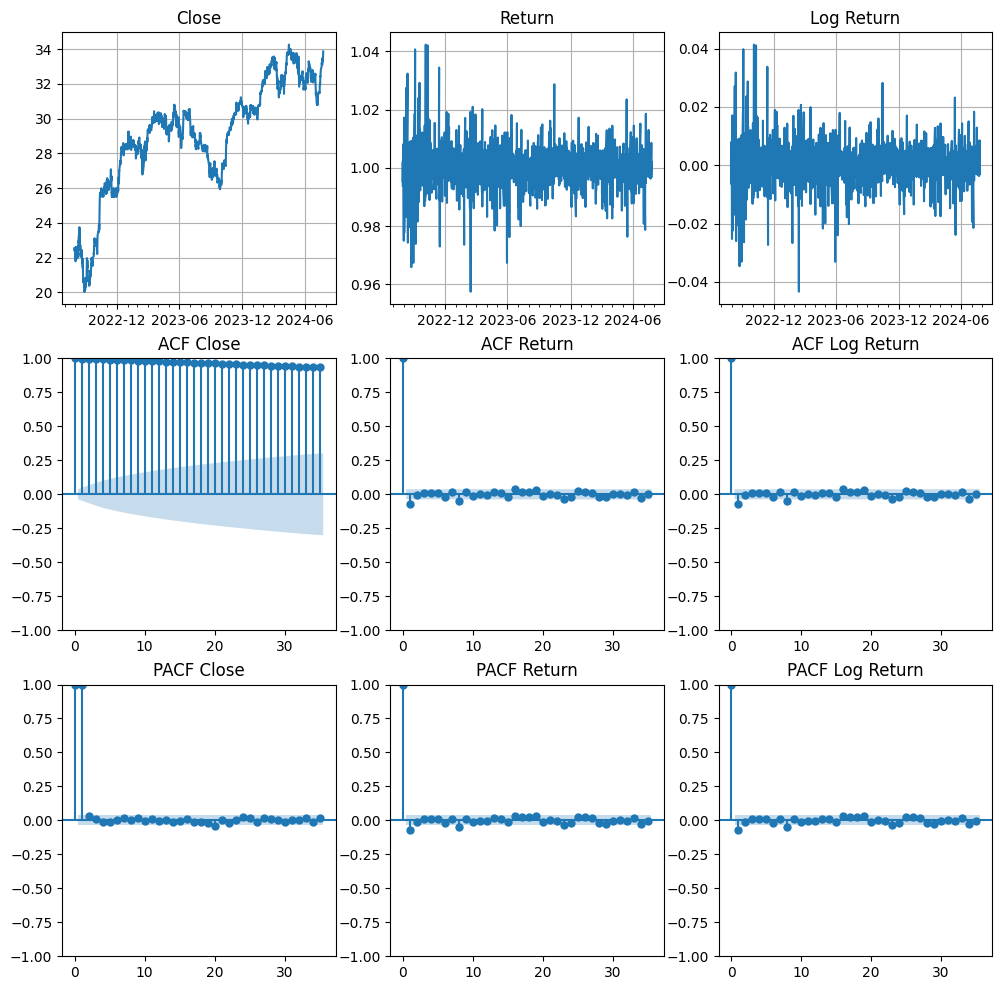

In [155]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

axs[0][0].plot(hist.loc[:, 'Close'])
axs[0][0].set_title('Close')

axs[0][1].plot(hist.loc[:, 'Return'])
axs[0][1].set_title('Return')

axs[0][2].plot(hist.loc[:, 'Log Return'])
axs[0][2].set_title('Log Return')

for ax in axs[0]:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)

plot_acf(hist.loc[:, 'Close'], ax = axs[1][0], title = 'ACF Close')
# exclude first value as it's NaN (from shifting)
plot_acf(hist.loc[hist.index[1]:, 'Return'], ax = axs[1][1], title = 'ACF Return')
plot_acf(hist.loc[hist.index[1]:, 'Log Return'], ax = axs[1][2], title = 'ACF Log Return')

plot_pacf(hist.loc[:, 'Close'], ax = axs[2][0], title = 'PACF Close')
# exclude first value as it's NaN (from shifting)
plot_pacf(hist.loc[hist.index[1]:, 'Return'], ax = axs[2][1], title = 'PACF Return')
plot_pacf(hist.loc[hist.index[1]:, 'Log Return'], ax = axs[2][2], title = 'PACF Log Return')

plt.show()

<code>Close</code> could be an AR(p) process (ACF tails off, PACF cuts off)